In [1]:
#importing libraries
import pandas as pd
import numpy as np
import sqlite3 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import string

!pip3 install wordcloud
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing csv files

pd_melatonine_gummies = pd.read_csv('C:/Users/gauri/Downloads/DSEM_Assignment3/B07VMJMZNP_NatrolKidsMelatoninGummy.csv')

pd_zarbee_kids = pd.read_csv('C:/Users/gauri/Downloads/DSEM_Assignment3/B01MAWIGWT_ZarbeesKids1mgMelatoninGummy.csv')

pd_SuperStrength  = pd.read_csv('C:/Users/gauri/Downloads/DSEM_Assignment3/B00K8K937I_PuritansPrideSuperStrengthRapidReleaseCapsules Melatonin.csv')

pd_VitamaticMelatonin = pd.read_csv('C:/Users/gauri/Downloads/DSEM_Assignment3/B08CGYFB2Q_VitamaticMelatonin20mgTablets.csv')

pd_CarlyleMelatonin1 = pd.read_csv('C:/Users/gauri/Downloads/DSEM_Assignment3/B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets.csv')

pd_MaxStrength = pd.read_csv('C:/Users/gauri/Downloads/DSEM_Assignment3/B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements.csv')

pd_CarlyleMelatonin = pd.read_csv('C:/Users/gauri/Downloads/DSEM_Assignment3/B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets.csv')

pd_MelatoninSleepAid = pd.read_csv('C:/Users/gauri/Downloads/DSEM_Assignment3/B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies.csv')

pd_NatrolMelatonin = pd.read_csv('C:/Users/gauri/Downloads/DSEM_Assignment3/B079TD7HG2_NatrolMelatoninSleepAidGummy.csv')


In [3]:
#concating all csv for kids into one dataframe and adults separately
df_adults = pd.concat([pd_SuperStrength,
                       pd_VitamaticMelatonin,
                       pd_CarlyleMelatonin1,
                       pd_MaxStrength,
                       pd_CarlyleMelatonin,
                       pd_MelatoninSleepAid,
                       pd_NatrolMelatonin])

df_kids = pd.concat([pd_melatonine_gummies,pd_zarbee_kids])


In [4]:
df_adults = df_adults.reset_index(drop=True)
df_kids = df_kids.reset_index(drop=True)

## Data Wrangling

#### Describing and exploring Adults DataFrame

In [5]:
df_adults

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,B079TD7HG2,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,Joshua,NaN,Verified Purchase,Style: 10mg | Size: 90 Count (Pack of 1),B079TD7HG2,https://www.amazon.com/Natrol-Melatonin-10Mg-G...,...,United States,Doesn’t taste good at all,NaN,Taste like medicine,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B079TD7...,Natrol,https://www.amazon.com/gp/customer-reviews/R2H...,B079TD7HG2
15906,B079TD7HG2,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,lisa t,NaN,Verified Purchase,Style: 10mg | Size: 140 Count (Pack of 1),B08666GMWG,https://www.amazon.com/Natrol-Melatonin-10Mg-G...,...,United States,I have tried many melatonin products over the ...,NaN,Only product that works for me,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B079TD7...,Natrol,https://www.amazon.com/gp/customer-reviews/R2O...,B079TD7HG2
15907,B079TD7HG2,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,Laurie,NaN,Verified Purchase,Style: 10mg | Size: 90 Count (Pack of 1),B079TD7HG2,https://www.amazon.com/Natrol-Melatonin-10Mg-G...,...,United States,Love to sleep soundly. Don't feel groggy next ...,NaN,Sleeping,NaN,https://www.amazon.com/gp/profile/

In [6]:
df_adults.shape

(15910, 22)

In [7]:
df_adults.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I


In [8]:
df_adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   asin                          15910 non-null  object 
 1   product_title                 15910 non-null  object 
 2   average_rating                15910 non-null  float64
 3   total_reviews                 15910 non-null  int64  
 4   review_author                 15910 non-null  object 
 5   author_badge                  102 non-null    object 
 6   badge                         15601 non-null  object 
 7   reviewed_product_attribute    13815 non-null  object 
 8   reviewed_variant_asin         13815 non-null  object 
 9   variant_review_url            13815 non-null  object 
 10  review_rating                 15910 non-null  float64
 11  review_date                   15910 non-null  object 
 12  reviewed_country              15910 non-null  object 
 13  r

In [9]:
df_adults.describe()

,average_rating,total_reviews,review_rating,review_comment_count
count,15910.000000,15910.000000,15910.000000,0.0
mean,4.575864,4037.575739,4.191012,NaN
std,0.078619,2070.915748,1.363767,NaN
min,4.500000,768.000000,1.000000,NaN
25%,4.500000,2749.000000,4.000000,NaN
50%,4.600000,3273.000000,5.000000,NaN
75%,4.600000,6594.000000,5.000000,NaN
max,4.700000,6594.000000,5.000000,NaN


In [10]:
# Check for any nulls values in df_adults
df_adults.isnull().sum()

asin                                0
product_title                       0
average_rating                      0
total_reviews                       0
review_author                       0
author_badge                    15808
badge                             309
reviewed_product_attribute       2095
reviewed_variant_asin            2095
variant_review_url               2095
review_rating                       0
review_date                         0
reviewed_country                    0
review_text                        24
review_comment_count            15910
review_header                       2
no_of_people_reacted_helpful    13149
author_profile_url                  0
url                                 0
brand                               0
review_url                          0
input                               0
dtype: int64

In [11]:
# Dropping columns that contains missing values

df_adults_copy = df_adults.copy()
df_adults_copy.dropna(axis='columns', inplace = True)

In [12]:
df_adults_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   asin                15910 non-null  object 
 1   product_title       15910 non-null  object 
 2   average_rating      15910 non-null  float64
 3   total_reviews       15910 non-null  int64  
 4   review_author       15910 non-null  object 
 5   review_rating       15910 non-null  float64
 6   review_date         15910 non-null  object 
 7   reviewed_country    15910 non-null  object 
 8   author_profile_url  15910 non-null  object 
 9   url                 15910 non-null  object 
 10  brand               15910 non-null  object 
 11  review_url          15910 non-null  object 
 12  input               15910 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


# Describing and exploring Kids Dataframe

In [13]:
df_kids

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,scarlet,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,"Encantada, funcionan perfectamente para ayudar...",NaN,Excelente,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R1N...,B07VMJMZNP
1,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,Dallin,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,This is the only melatonin candy our daughter ...,NaN,THIS WORKS!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R2D...,B07VMJMZNP
2,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,Plinio,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,I don’t usually write reviews unless I am wowe...,NaN,Wow! Works like a charm!,3.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/RJA...,B07VMJMZNP
3,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,L. K. Kendall,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,Terrific product!,NaN,Wonderful,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R3P...,B07VMJMZNP
4,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,Amazon Customer,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,"We don't use them every night, but my kids wil...",NaN,"Kids eat them, they seem to work",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R2W...,B07VMJMZNP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,AutumnHood,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,These are amazing! They work great and taste d...,NaN,Work fast and taste great!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R26...,B01MAWIGWT
4136,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,agnieszka domarecka,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,It doesn't really work on my son but he loves ...,NaN,It's ok,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/RNX...,B01MAWIGWT
4137,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,LockerMan,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,No issues. it is helping my kids. Thanks a lot.,NaN,It works.,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-revi

In [14]:
df_kids.shape

(4140, 22)

In [15]:
df_kids.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,scarlet,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,"Encantada, funcionan perfectamente para ayudar...",NaN,Excelente,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R1N...,B07VMJMZNP
1,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,Dallin,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,This is the only melatonin candy our daughter ...,NaN,THIS WORKS!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R2D...,B07VMJMZNP
2,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,Plinio,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,I don’t usually write reviews unless I am wowe...,NaN,Wow! Works like a charm!,3.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/RJA...,B07VMJMZNP
3,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,L. K. Kendall,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,Terrific product!,NaN,Wonderful,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R3P...,B07VMJMZNP
4,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,Amazon Customer,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,"We don't use them every night, but my kids wil...",NaN,"Kids eat them, they seem to work",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R2W...,B07VMJMZNP


In [16]:
df_kids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   asin                          4140 non-null   object 
 1   product_title                 4140 non-null   object 
 2   average_rating                4140 non-null   float64
 3   total_reviews                 4140 non-null   int64  
 4   review_author                 4140 non-null   object 
 5   author_badge                  14 non-null     object 
 6   badge                         3985 non-null   object 
 7   reviewed_product_attribute    4138 non-null   object 
 8   reviewed_variant_asin         4138 non-null   object 
 9   variant_review_url            4138 non-null   object 
 10  review_rating                 4140 non-null   float64
 11  review_date                   4140 non-null   object 
 12  reviewed_country              4140 non-null   object 
 13  rev

In [17]:
df_kids.describe()

,average_rating,total_reviews,review_rating,review_comment_count
count,4140.000000,4140.000000,4140.000000,0.0
mean,4.721498,2747.582126,4.367391,NaN
std,0.041086,971.672575,1.285919,NaN
min,4.700000,891.000000,1.000000,NaN
25%,4.700000,3256.000000,5.000000,NaN
50%,4.700000,3256.000000,5.000000,NaN
75%,4.700000,3256.000000,5.000000,NaN
max,4.800000,3256.000000,5.000000,NaN


In [18]:
# checking missing values in data for kids

df_kids.isnull().sum()

asin                               0
product_title                      0
average_rating                     0
total_reviews                      0
review_author                      0
author_badge                    4126
badge                            155
reviewed_product_attribute         2
reviewed_variant_asin              2
variant_review_url                 2
review_rating                      0
review_date                        0
reviewed_country                   0
review_text                        3
review_comment_count            4140
review_header                      0
no_of_people_reacted_helpful    3549
author_profile_url                 0
url                                0
brand                              0
review_url                         0
input                              0
dtype: int64

In [19]:
# Dropping columns that contains missing values

df_kids_copy = df_adults.copy()
df_kids_copy.dropna(axis='columns', inplace = True)

In [20]:
df_kids_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   asin                15910 non-null  object 
 1   product_title       15910 non-null  object 
 2   average_rating      15910 non-null  float64
 3   total_reviews       15910 non-null  int64  
 4   review_author       15910 non-null  object 
 5   review_rating       15910 non-null  float64
 6   review_date         15910 non-null  object 
 7   reviewed_country    15910 non-null  object 
 8   author_profile_url  15910 non-null  object 
 9   url                 15910 non-null  object 
 10  brand               15910 non-null  object 
 11  review_url          15910 non-null  object 
 12  input               15910 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [21]:
# Converting the date column to datetime since it is an object with type String.

df_adults_copy['review_date'] = pd.to_datetime(df_adults_copy['review_date'])
df_kids_copy['review_date'] = pd.to_datetime(df_kids_copy['review_date'])


In [22]:
# Adding another column along with the Review_year column

df_adults_copy['year'] = df_adults_copy['review_date'].dt.year
df_kids_copy['year'] = df_kids_copy['review_date'].dt.year


In [23]:
df_adults_copy.head()

,asin,product_title,average_rating,total_reviews,review_author,review_rating,review_date,reviewed_country,author_profile_url,url,brand,review_url,input,year
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,4.0,2021-05-02,United States,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I,2021
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,4.0,2022-05-11,United States,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I,2022
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,5.0,2021-05-10,United States,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I,2021
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,5.0,2017-04-20,United States,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I,2017
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,5.0,2020-08-18,United States,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I,2020


In [24]:
# Finding duplicate in review_author in adults DataFrame

column = df_adults['review_author']
duplicates = column.duplicated()
num_duplicates = duplicates.sum()
print(f'The number of duplicate values in the column is: {num_duplicates}')

The number of duplicate values in the column is: 2927


In [25]:
# displaying duplicate values in Adults

column_to_check = df_adults['review_author']
duplicates = column_to_check[column_to_check.duplicated()]
print('Duplicate values in the column:')
for value in duplicates.unique():
    print(value)

Duplicate values in the column:
Amazon Customer
David
Kindle Customer
Melissa
Mo
Jessica
Mark
Chris
John
Denise
Paul
Jane
Ruth E. Pago
Gene
peter
Matthew
Angela
old cop
Kim
horsepoor
Geezers R Us!
Michelle
dotbear
A. Glass
Michael
Terry
Crystal
Sean
Christopher
Tom
Marco67
Elizabeth
Heather
Anon
Linda
D. Blew
Hannah
David Hart
Iffy
Jim P
A. W
D. L.
Ann
James
Lisa L.
christie
Doc
Sgt. Scott
Tony
William J. Dager
Phil
Nick
Cliente Amazon
Pete
Ladylove
Joe
Marc
Avid Reader
Jennifer
Anonymous
Tammy
melissa
MJ Aaron
Jack
Dennis Soch
Robert
ZORICA TODOSIJEVIC
none
Amanda
Don
Ray
Sue
ChristyO
Brian
Kellie Workman
Jen
Robert B. Clements
Exerciser
Lizzy
Karen Quinton
K
William L. Charlton
Betsy
Markis
Josh
PC guy Phill
florentino Aguilar
Samantha
Will
Nika
Kryztals2
BL
Mike
michael
jessica
Michelle Heath
ashley
Terry Ricket
customer
knatkins
Dee
Kimberly
Julia Johnson
Liz
MGONZALEZ
Bridget
Aaron James Gonzales
Steve
Laura
Levan L.
Kat
Virginia Fish
Courtney
MK
Mac
The eBook Investigator
Valerie

In [26]:
# Finding duplicate in review_author in kids DataFrame

column = df_kids['review_author']
duplicates = column.duplicated()
num_duplicates = duplicates.sum()
print(f'The number of duplicate values in the column is: {num_duplicates}')

The number of duplicate values in the column is: 615


In [27]:
# displaying duplicate values in Adults

column_to_check = df_kids['review_author']
duplicates = column_to_check[column_to_check.duplicated()]
print('Duplicate values in the column:')
for value in duplicates.unique():
    print(value)

Duplicate values in the column:
Amazon Customer
Dee
Kirsten
Kindle Customer
Kira
Mariah
Lily
Sarah
Ryan
Jasmine
Heather
Emily
Kelly
Chelsea
Nicole
Carly
Jen
Christine
Melissa
Brenda
Brittany
Jennifer
Donna
Lindsey
Veronica
Christina
Stephanie
Ashley
angela
Gloria
Anonymous
Jessica
Victoria
Kristen
James
Ashlee
Cindy
Daniela
Kayla T
Kayla
Kimberly
Brooke
Katherine
summer
Morgan
Mandy
Maria
CJ
Casey
Renee
Mel
Andrea
Laura
Mandee
Becky
Clarissa
Michelle
Susan
Amy
Erika
Robin
Crystal
Lisa
Nancy
Elizabeth
Kate
Patricia
Nicole M
Karla
Amber
Hannah
KLS
Pammela Wiggins
Michael
Lauren
Lori
Denise
CB
Angie
Krystal
Suzy
Sandra
Erin
Adriana
Kelli
Esperanza
Rebecca
Beth
Nic
Alyssa
Brian
Mary
Brandon
Tiffany
Katie
Roxy
Desiree
Britt
Kyle
Amanda
Jeff
katherine
sarah
Norma
Jennifer Hernandez
Carlos
Taylor
anonymous
Karen
Danielle
Bob
Angel
Kim
Olivia
cassie
Johnny
Steph
Chris
Mika
Erica
Alex
Megan
Lacey
Vanessa
April
Nikki
Carolina
Thomas
Melinda
Britney
Andy
Liz
mario
Gina
Tara
jewelz
KP
Mari
Mallory

# Exploratory Data Analysis

#### 1. How many Rating per review authors?

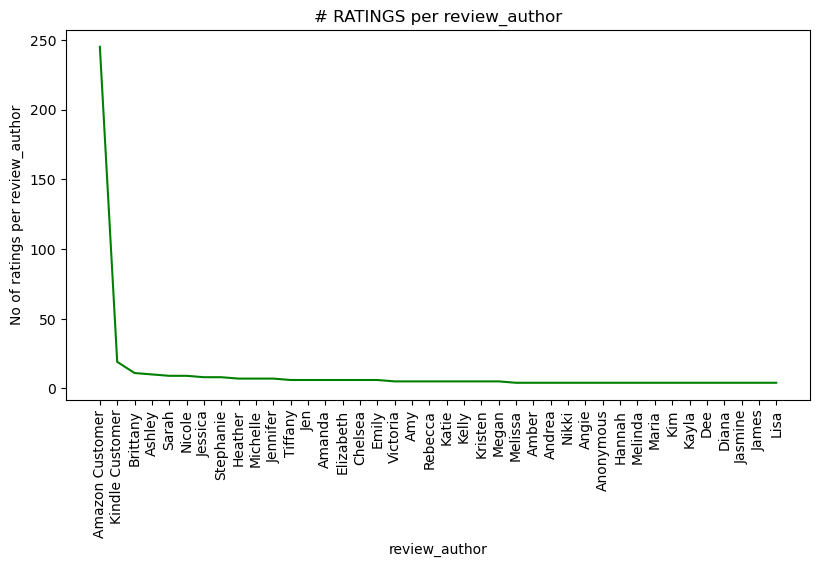

In [28]:
new_df=df_kids.groupby("review_author").filter(lambda x:x['average_rating'].count() >=4)
no_of_ratings_per_product = new_df.groupby(by='review_author')['average_rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values, color = 'g')
plt.title('# RATINGS per review_author')
plt.xlabel('review_author')
plt.ylabel('No of ratings per review_author')
plt.xticks(range(len(no_of_ratings_per_product.index)), no_of_ratings_per_product.index, rotation=90)


plt.show()

#### 2. Mean of Rating count as per asin for kids

In [29]:
new2_df=df_kids.groupby("asin").filter(lambda x:x['review_rating'].count() >=4)
new2_df.groupby('asin')['review_rating'].count().sort_values(ascending=False).head()
ratings_mean_count = pd.DataFrame(new_df.groupby('asin')['review_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new2_df.groupby('asin')['review_rating'].count())
ratings_mean_count.head()



,review_rating,rating_counts
asin,,
B01MAWIGWT,4.271277,3250
B07VMJMZNP,4.252525,890


In [30]:
ratings_mean_count['rating_counts'].max()

3250

In [31]:
new3_df = df_kids.groupby('asin').filter(lambda x: x['review_rating'].count() >= 4)
ratings_mean_count = pd.DataFrame(new3_df.groupby('asin')['review_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new3_df.groupby('asin')['review_rating'].count())


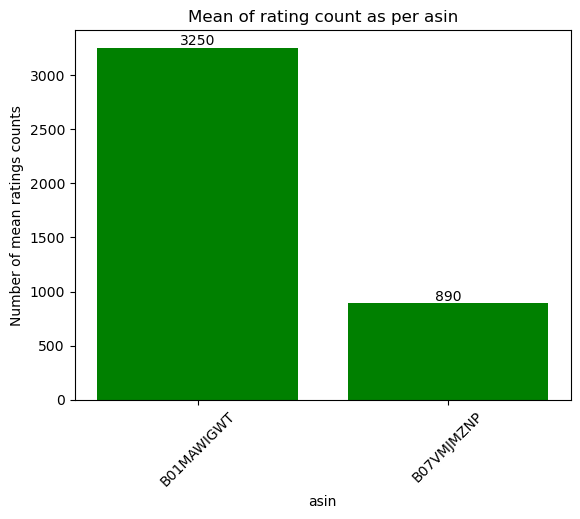

In [32]:
# sort the dataframe by rating counts in descending order
sorted_df = ratings_mean_count.sort_values('rating_counts', ascending=False)

top_products = sorted_df

# create a bar graph
plt.bar(top_products.index, top_products['rating_counts'], color = 'g')

# add x and y labels
plt.xlabel('asin')
plt.ylabel('Number of mean ratings counts')

# add a title
plt.title('Mean of rating count as per asin')

# rotate the x-tick labels for better visibility
plt.xticks(rotation=45)

for i, v in enumerate(top_products['rating_counts']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# display the plot
plt.show()


#### 3.Mean of review rating as per asin for kids

In [33]:
new6_df = df_kids.groupby('asin').filter(lambda x: x['review_rating'].count() >= 4)
ratings_mean_count1 = pd.DataFrame(new6_df.groupby('asin')['review_rating'].mean())
ratings_mean_count1['rating_counts'] = pd.DataFrame(new6_df.groupby('asin')['review_rating'].count())


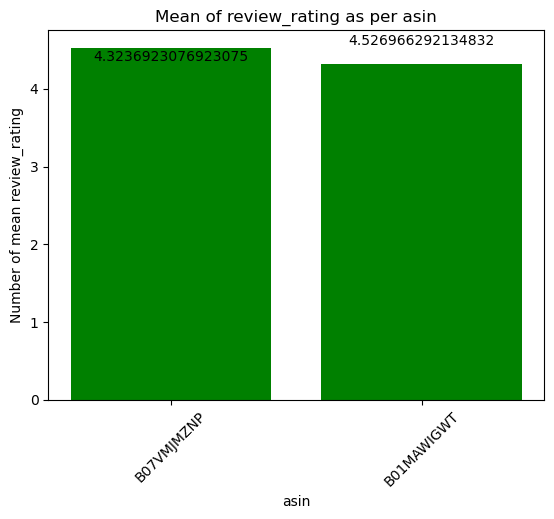

In [34]:
# sort the dataframe by rating counts in descending order
sorted_df1 = ratings_mean_count1.sort_values('review_rating', ascending=False)

top_products1 = sorted_df1

# create a bar graph
plt.bar(top_products1.index, top_products1['review_rating'], color = 'g')

# add x and y labels
plt.xlabel('asin')
plt.ylabel('Number of mean review_rating')

# add a title
plt.title('Mean of review_rating as per asin')

# rotate the x-tick labels for better visibility
plt.xticks(rotation=45)

for i, v in enumerate(top_products['review_rating']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# display the plot
plt.show()


#### 4. Mean of Rating count as per asin for Adults

In [35]:
new5_df = df_adults.groupby('asin').filter(lambda x: x['review_rating'].count() >= 4)
ratings_mean_count1 = pd.DataFrame(new5_df.groupby('asin')['review_rating'].mean())
ratings_mean_count1['rating_counts'] = pd.DataFrame(new5_df.groupby('asin')['review_rating'].count())

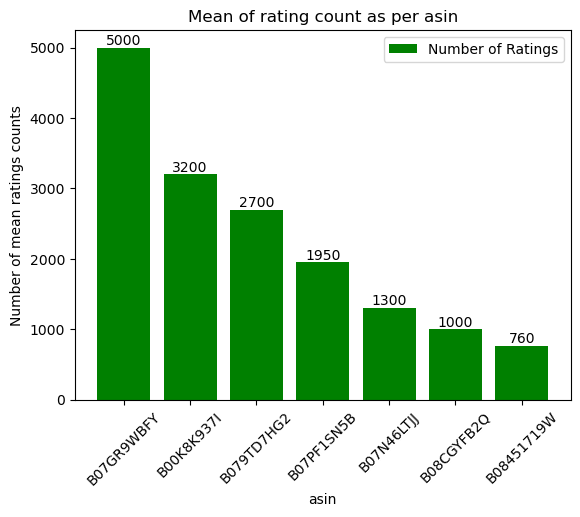

In [36]:
# sort the dataframe by rating counts in descending order
sorted_df = ratings_mean_count1.sort_values('rating_counts', ascending=False)

top_products = sorted_df

# create a bar graph
plt.bar(top_products.index, top_products['rating_counts'], color='g', label='Number of Ratings')
plt.legend()

# add x and y labels
plt.xlabel('asin')
plt.ylabel('Number of mean ratings counts')

# add a title
plt.title('Mean of rating count as per asin')

# rotate the x-tick labels for better visibility
plt.xticks(rotation=45)
for i, v in enumerate(top_products['rating_counts']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# display the plot
plt.show()

#### 5. displaying a histogram for average rating of medicines for adults

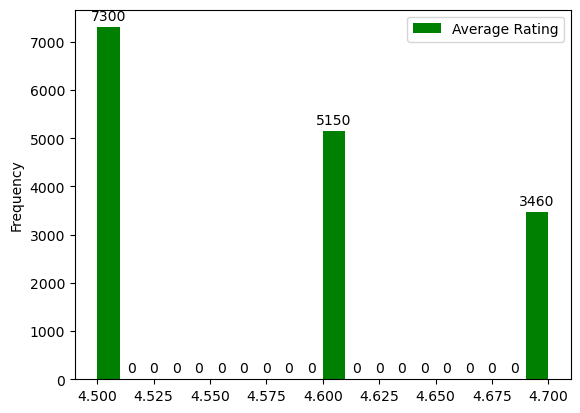

In [37]:
# Plotting 'average_rating' of medicines for Adults

# create the histogram
df_adults['average_rating'].plot(kind='hist', bins=20, color='g')

# add data labels to the bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# add a legend
plt.legend(['Average Rating'], loc='upper right')

# show the plot
plt.show()

#### 6. Average Rating of Medicines for Adults

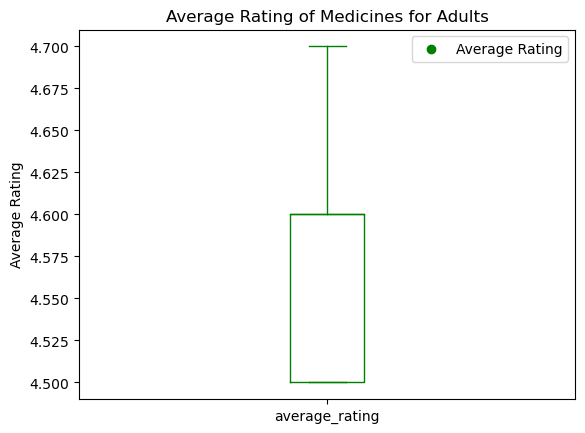

In [38]:
# create the box plot
df_adults['average_rating'].plot(kind='box', color='green')

plt.scatter([], [], label='Average Rating', color='green')

plt.legend(loc='upper right')
plt.title('Average Rating of Medicines for Adults')
plt.ylabel('Average Rating')


plt.show()


##### --> here we can see that the minimum value is also equal to the lower quartile.

# Sentiment Analysis

In [39]:
# Download the 'punkt' tokenizer resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
# Load the VADER lexicon
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Sentiment Analysis for kids

In [43]:
# Remove missing values from the text column
df_kids = df_kids.dropna(subset=['review_text'])

In [44]:
# Concatinating all the comments into a one string
comments = " ".join(df_kids['review_text'])

In [45]:
# Tokenize the string into individual words
words = nltk.word_tokenize(comments)

In [46]:
# eliminating stop words from the list
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.lower() not in stop_words]

In [47]:
# eliminating punctuation marks from the list
words = [word.lower() for word in words if word not in string.punctuation]

In [48]:
# Counting the frequency of each word in the list
counts = Counter(words)

In [49]:
# Sorting the list of words by frequency in descending order
sort_words = sorted(counts.items(), key=lambda x: x[1], reverse=True)

In [50]:
# Selecting the top "15" words with the highest frequency
top_n_words = 15
hot_words = [word[0] for word in sort_words[:top_n_words]]

In [51]:
print(hot_words)

['sleep', '’', 'night', 'asleep', 'kids', 'old', 'one', 'like', 'great', 'time', 'work', 'bed', 'works', 'year', 'get']


In [52]:
# Perform part-of-speech tagging on the words
pos_tags = nltk.pos_tag(words)

In [53]:
# Select the words related to dosage, effect after eating, and evaluation
relevant_words = []
for i in range(len(pos_tags)):
    word = pos_tags[i][0]
    tag = pos_tags[i][1]
    if tag.startswith('VB') and (word.lower() == 'take' or word.lower() == 'eat'):
        relevant_words.append(word)
    elif word.lower() == 'effect':
        relevant_words.append(word)
    elif tag.startswith('JJ') and (word.lower() == 'right' or word.lower() == 'recommend'):
        relevant_words.append(word)

In [54]:
# Print the relevant words
print(relevant_words)

['take', 'eat', 'take', 'take', 'take', 'take', 'right', 'recommend', 'right', 'take', 'take', 'effect', 'take', 'take', 'effect', 'take', 'take', 'take', 'take', 'eat', 'recommend', 'take', 'take', 'effect', 'take', 'take', 'take', 'take', 'take', 'take', 'right', 'take', 'effect', 'take', 'right', 'recommend', 'take', 'take', 'take', 'take', 'take', 'take', 'recommend', 'take', 'take', 'take', 'take', 'take', 'take', 'recommend', 'eat', 'take', 'take', 'right', 'recommend', 'take', 'take', 'take', 'recommend', 'eat', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'right', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'effect', 'take', 'right', 'right', 'take', 'take', 'right', 'recommend', 'take', 'take', 'take', 'recommend', 'right', 'take', 'take', 'right', 'recommend', 'effect', 'take', 'take', 'take', 'effect', 'take', 'take', 'take', 'take', 'effect', 'effect', 'effect', 'right', 'take', 'eat', 'take', 'take', 'take', 'eat', 'take', 'recommend', 'take', 'take'

In [55]:
# Load the VADER lexicon
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [56]:
df_kids['SentimentScore'] = 0.0

In [57]:
# Remove missing values from the text column
df_kids = df_kids.dropna(subset=['review_text'])

In [58]:
for i in range(len(df_kids)):
    text = df_kids.iloc[i]['review_text']
    sentiment_score = sia.polarity_scores(text)
    df_kids.loc[i, 'SentimentScore'] = sentiment_score['compound']


In [59]:
df_kids

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,SentimentScore
0,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891.0,scarlet,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,"Encantada, funcionan perfectamente para ayudar...",NaN,Excelente,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R1N...,B07VMJMZNP,0.0000
1,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891.0,Dallin,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,This is the only melatonin candy our daughter ...,NaN,THIS WORKS!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R2D...,B07VMJMZNP,0.6369
2,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891.0,Plinio,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,I don’t usually write reviews unless I am wowe...,NaN,Wow! Works like a charm!,3.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/RJA...,B07VMJMZNP,0.9809
3,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891.0,L. K. Kendall,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,Terrific product!,NaN,Wonderful,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R3P...,B07VMJMZNP,0.5255
4,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891.0,Amazon Customer,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,"We don't use them every night, but my kids wil...",NaN,"Kids eat them, they seem to work",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R2W...,B07VMJMZNP,0.5499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256.0,Heather B.,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,This vitamin is amazing for my 11yr old who ta...,NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R4R...,B01MAWIGWT,0.0000
4139,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256.0,Andrew Hiser,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,Helps my son sleep better at night. That is al...,NaN,Helps my son sleep better at night. That is al...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/RUV...,B01MAWIGWT,0.0000
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8625
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6204


# Sentiment Analysis for kids

In [60]:
# eliminating missing values from the text column
df_adults = df_adults.dropna(subset=['review_text'])

In [61]:
# Combining all the comments into a single string
comments = " ".join(df_adults['review_text'])

In [62]:
# Tokenize the string into individual words
words = nltk.word_tokenize(comments)

In [63]:
# Remove stop words from the list of words
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.lower() not in stop_words]

In [64]:
# Remove punctuation marks from the list of words
words = [word.lower() for word in words if word not in string.punctuation]

In [65]:
# Count the frequency of each word in the list
word_counts = Counter(words)

In [66]:
# Sort the list of words by frequency in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

In [67]:
# Select the top "15" words with the highest frequency
top_n_words = 15
hot_words = [word[0] for word in sorted_words[:top_n_words]]

In [68]:
print(hot_words)

['sleep', '’', 'melatonin', 'work', 'great', 'take', 'asleep', 'good', 'night', 'product', "n't", 'works', 'taste', 'like', 'get']


In [69]:
# Perform part-of-speech tagging on the words
pos_tags = nltk.pos_tag(words)

In [70]:
# Select the words related to dosage, effect after eating, and evaluation
relevant_words = []
for i in range(len(pos_tags)):
    word = pos_tags[i][0]
    tag = pos_tags[i][1]
    if tag.startswith('VB') and (word.lower() == 'take' or word.lower() == 'eat'):
        relevant_words.append(word)
    elif word.lower() == 'effect':
        relevant_words.append(word)
    elif tag.startswith('JJ') and (word.lower() == 'right' or word.lower() == 'recommend'):
        relevant_words.append(word)

In [71]:
# Print the relevant words
print(relevant_words)

['right', 'take', 'effect', 'effect', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'right', 'take', 'effect', 'take', 'take', 'take', 'take', 'take', 'take', 'effect', 'take', 'take', 'take', 'take', 'take', 'recommend', 'effect', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'effect', 'take', 'take', 'take', 'effect', 'take', 'take', 'right', 'take', 'take', 'take', 'effect', 'take', 'take', 'take', 'take', 'take', 'recommend', 'take', 'effect', 'take', 'right', 'take', 'effect', 'take', 'take', 'effect', 'take', 'take', 'effect', 'take', 'take', 'take', 'take', 'effect', 'right', 'effect', 'right', 'recommend', 'effect', 'take', 'take', 'effect', 'effect', 'take', 'take', 'take', 'take', 'effect', 'right', 'take', 'effect', 'effect', 'right', 'take', 'right', 'take', 'take', 'take', 'take', 'take', 'effect', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'take', 'effect', 'take', 'take', 'right', 't

In [72]:
df_adults['SentimentScore'] = 0.0

In [73]:
for i in range(len(df_adults)):
    text = df_adults.iloc[i]['review_text']
    sentiment_score = sia.polarity_scores(text)
    df_adults.loc[i, 'SentimentScore'] = sentiment_score['compound']

In [74]:
df_adults

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,SentimentScore
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273.0,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I,0.6249
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273.0,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I,0.5242
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273.0,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I,0.7964
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273.0,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I,0.8519
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273.0,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I,0.8883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5423
13544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4404
14392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1634
14589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7650


# Visulaization for kids

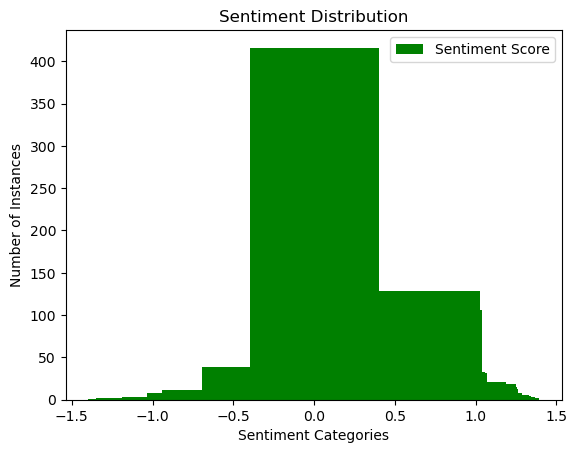

In [75]:
# Create bar chart of sentiment categories
sentiment_counts = df_kids['SentimentScore'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color = 'g')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of Instances')
plt.legend(['Sentiment Score'])
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


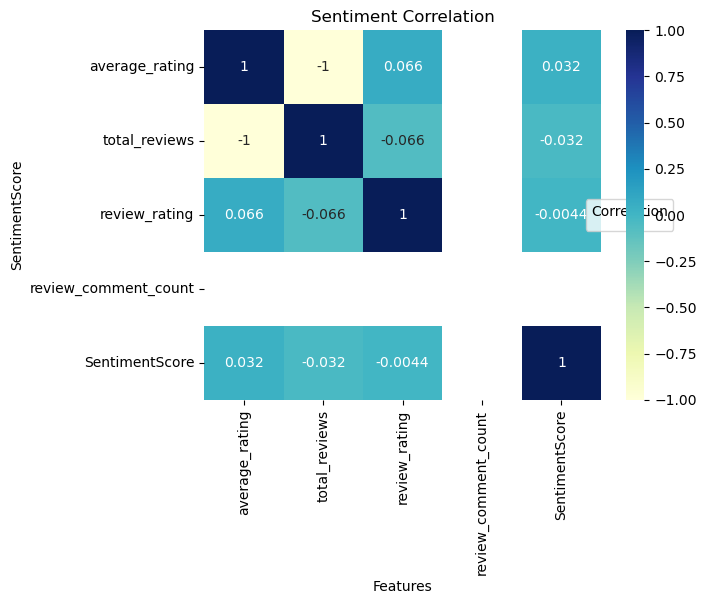

In [76]:
sns.heatmap(df_kids.corr(), cmap='YlGnBu', annot=True)
plt.title('Sentiment Correlation')
plt.xlabel('Features')
plt.ylabel('SentimentScore')
plt.legend(title='Correlation', loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.show()


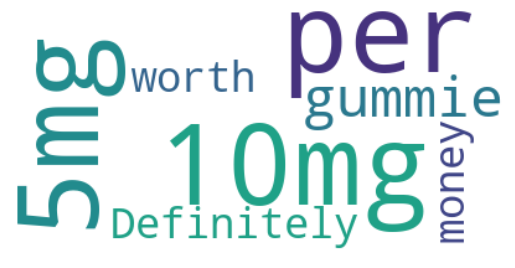

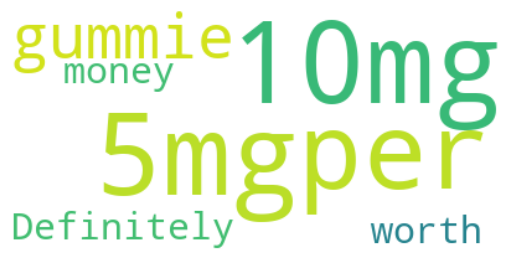

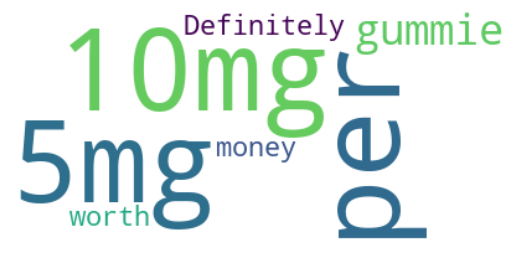

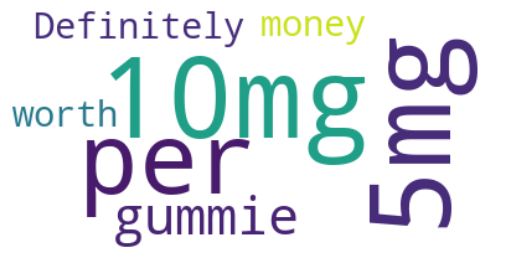

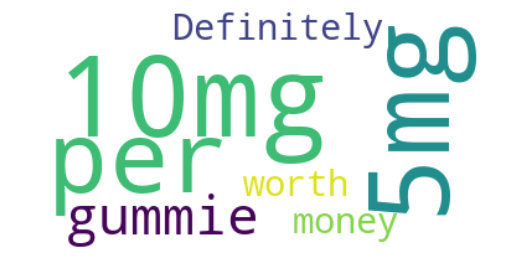

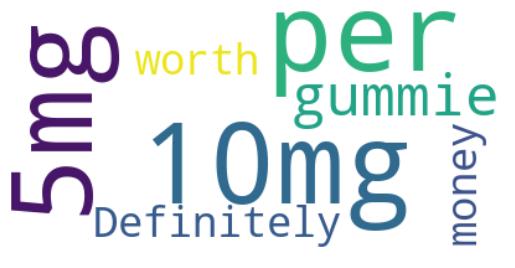

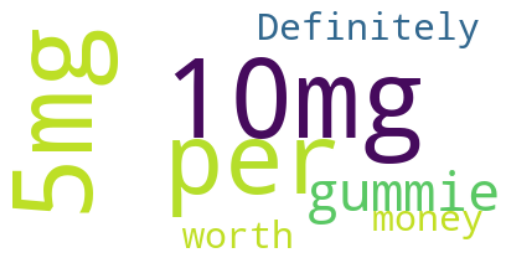

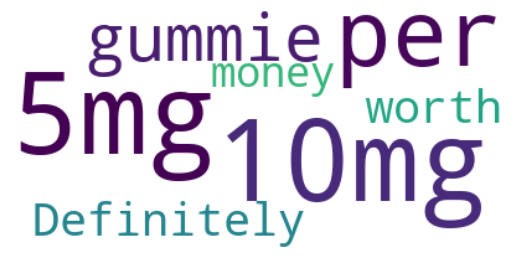

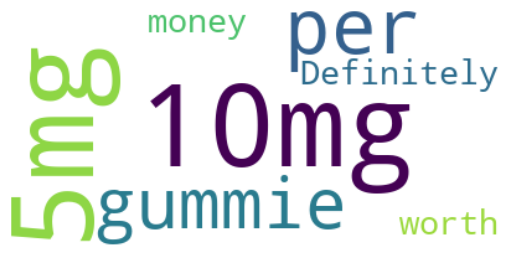

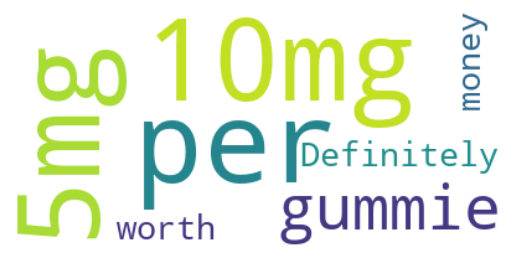

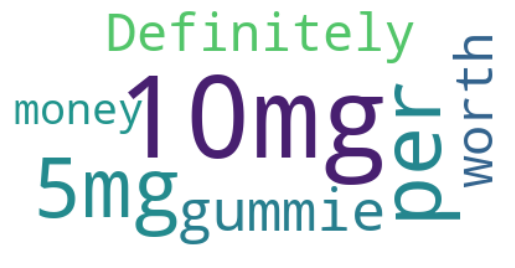

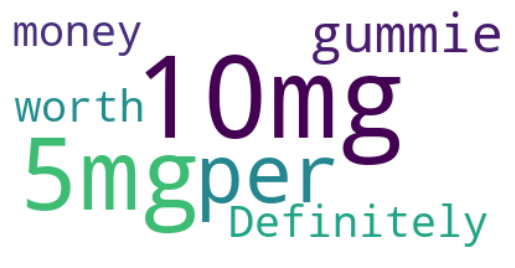

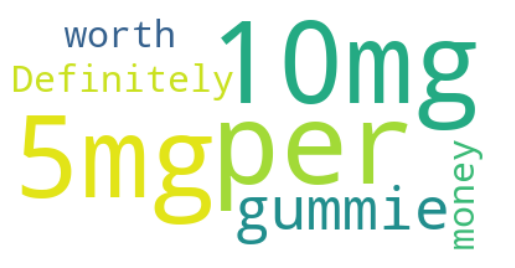

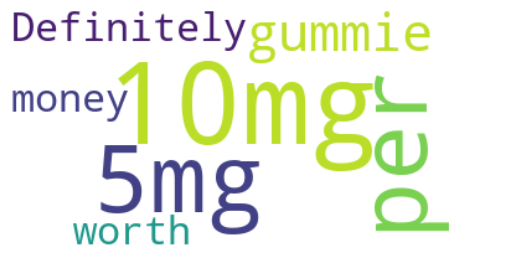

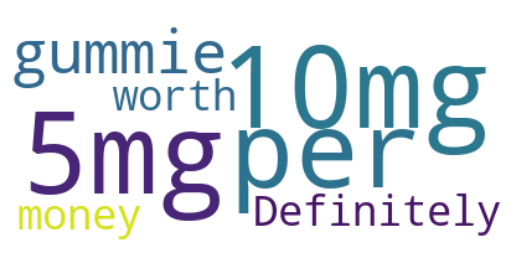

In [77]:
# Create word clouds for each sentiment category
for sentiment in hot_words:
    #text = ' '.join(kidsDf.loc[kidsDf['SentimentScore'] == sentiment, 'review_text'].values)
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.title(sentiment + ' Word Cloud')
    plt.show()

# Sentiment Analysis for adults

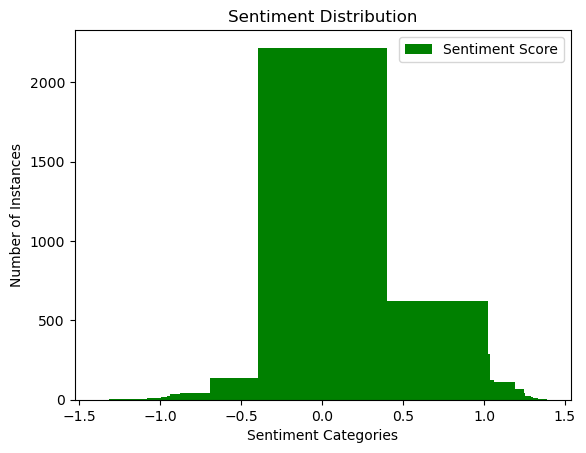

In [78]:
# Create bar chart of sentiment categories
sentiment_counts = df_adults['SentimentScore'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color='g')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of Instances')
plt.legend(['Sentiment Score'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


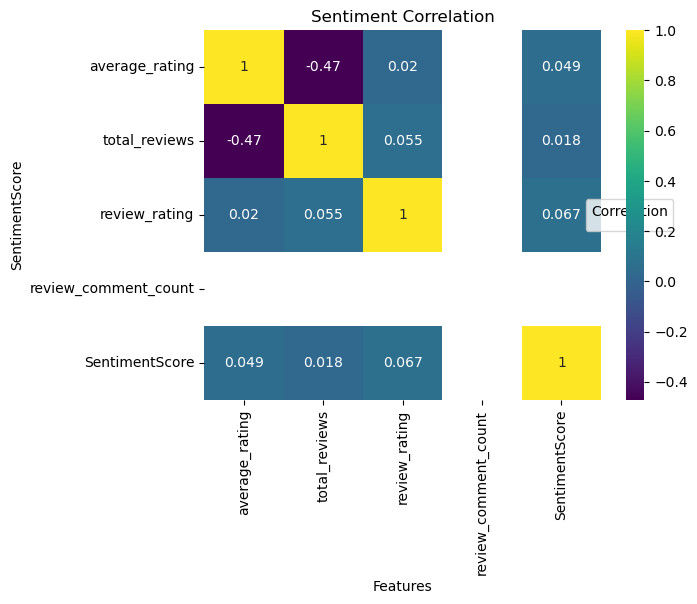

In [79]:
sns.heatmap(df_adults.corr(), cmap='viridis', annot=True)
plt.title('Sentiment Correlation')
plt.xlabel('Features')
plt.ylabel('SentimentScore')
plt.legend(title='Correlation', loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.show()


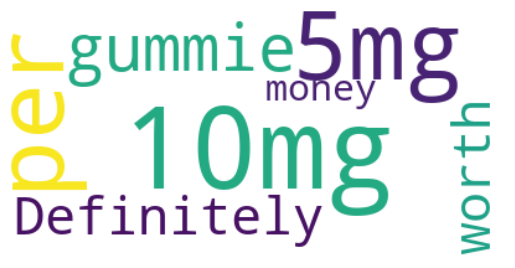

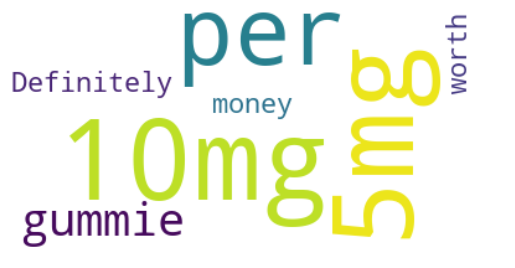

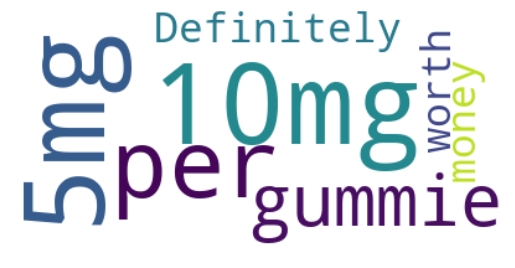

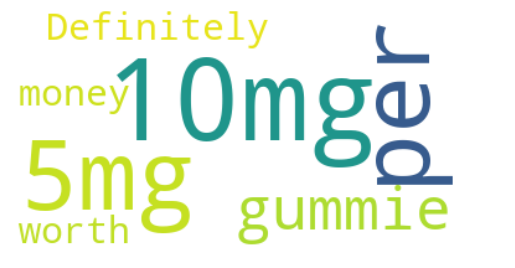

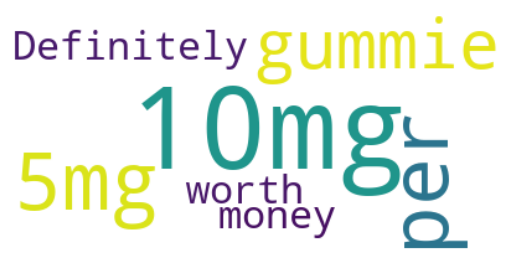

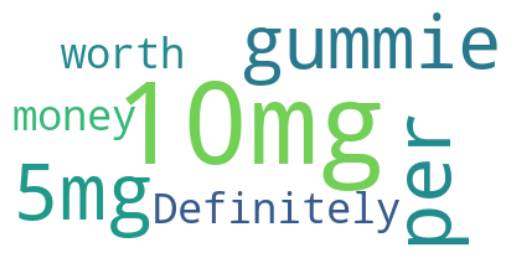

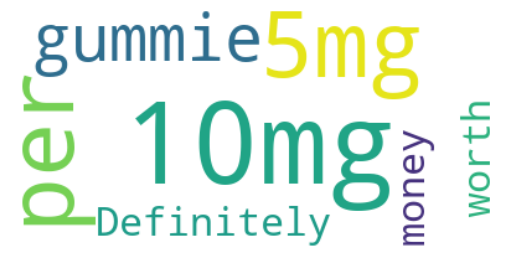

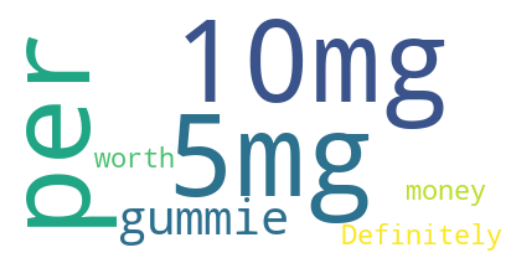

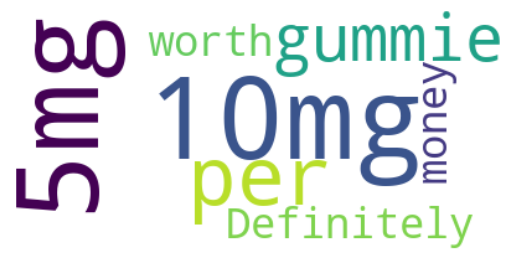

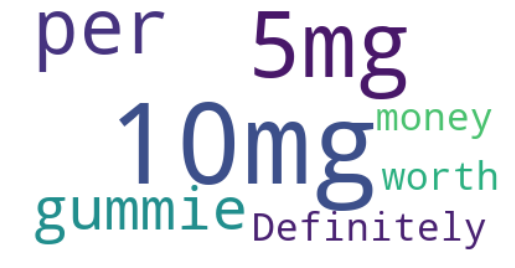

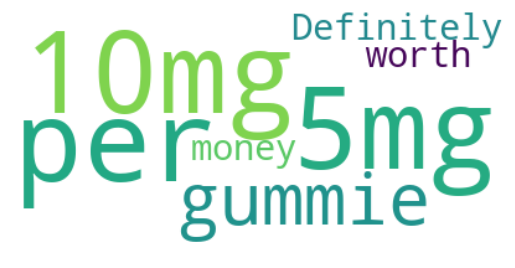

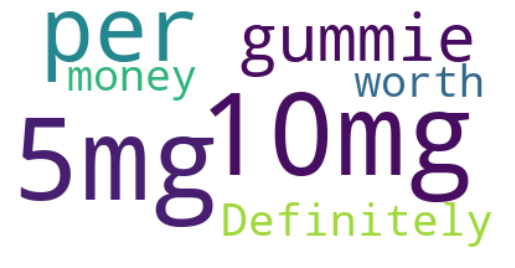

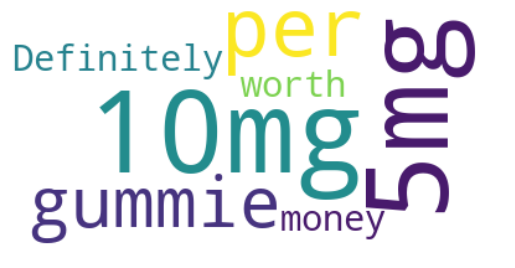

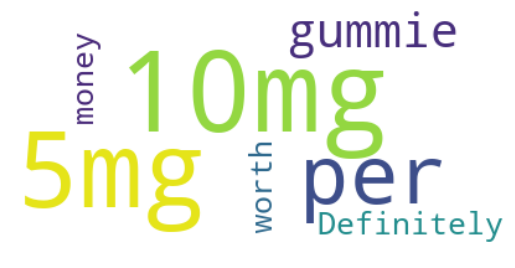

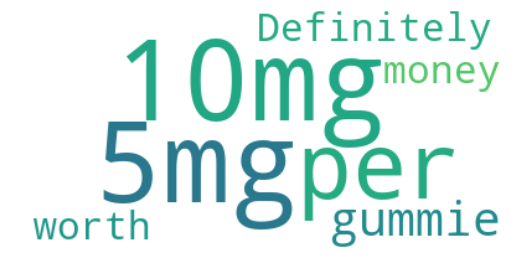

In [80]:
# Create word clouds for each sentiment category
for sentiment in hot_words:
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.title(sentiment + ' Word Cloud')
    plt.show()